<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off or in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-06-04 14:48:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-06-04 14:48:40 (387 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

In [5]:
# checking the Datatype of each column in dataframe
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

### Convert to date time object


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [8]:
# if you want to install conda
# !pip install conda

In [9]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

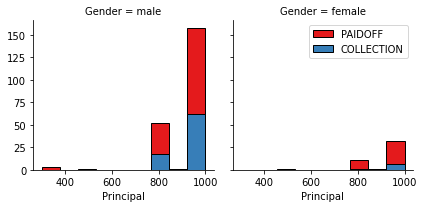

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10) # bins with 10 values as specified
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

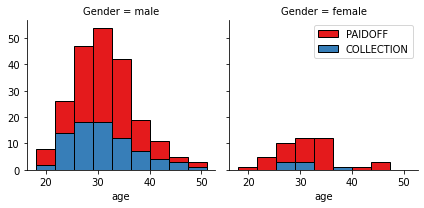

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


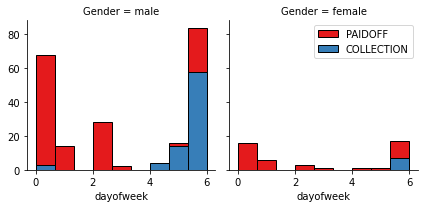

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek

bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use `Feature binarization`to set a threshold value less than day 4 <br>
--> `Feature binarization` set the value to 0 if the it's below threshold value t and 1 if it's above the threshold value t
 or vice versa.

In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True) # .to_frame() to display it as Dataframe

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert `categorical varables to binary variables` and append them to the feature Data Frame


In [18]:
Feature = df[['Principal','terms','age','Gender','weekend']]

Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [19]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [20]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [21]:
# isplay the number of people corresponding to 'loan_status'
# convert 'y' to Dataframe to apply 'value_counts()' function
pd.DataFrame(y).value_counts()

PAIDOFF       260
COLLECTION     86
dtype: int64

## Normalize Data


`Data Standardization` give data zero mean and unit variance (**technically should be done after train test split**)<br>
--> `Data standardization` is a data processing workflow that **converts the structure of different datasets into one common format of data.** <br>It deals with the transformation of datasets after the data are collected from different sources and before it is loaded into target systems.


In [22]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.<br>
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your `train_loan.csv` into train and test to find the best **k**.


In [23]:
# Let's load required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

# 'loan_train.csv' data is cleaned and normalized above to be used
# 'X' contains normalized Features set(inputs variables) and target variable 'loan_status' as 'y'
print("Normalized feature sets:\n", X[:5])
print("Normalized target variable:\n", y[:5])

Normalized feature sets:
 [[ 0.51578458  0.92071769  2.33152555 -0.42056004 -1.20577805 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.34170148  2.37778177 -1.20577805  2.61985426
  -0.87997669 -0.86968108]
 [ 0.51578458 -0.95911111 -0.65321055 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.48739188  2.37778177  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.3215732  -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]]
Normalized target variable:
 ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [24]:
# Now, use train-test split function to check and improve the out-of-sample accuracy of the model
# Using train-test split() to split the dataset into Training set and Testing test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [25]:
# import classifier implementing k-Nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

# Lets start kNN algorithm with inital value of k=5
k = 5

# Train Model and predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
knnPredictions = neigh.predict(X_test)

# Lets compare the predicted value with actual test values
print("Predicted class labels: \n", knnPredictions[:5])
print("Actual Class labels: \n", y_test[:5])
print()

# lets measure model accuracy with k= 5 using "accuracy_score()"
# calculates how closey the actual labels and predicted labels are matched in the test set
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knnPredictions))

Predicted class labels: 
 ['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Actual Class labels: 
 ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']

Train set Accuracy:  0.8152173913043478
Test set Accuracy:  0.7571428571428571


In [26]:
# Finding the Accuracy of the Model with different value of k(upto k=10)
k = 10 # 'k' refers to number of nearest neighbors to examine
test_acc = np.zeros(k) # array to store values of model accuracy test of each  k for plotting
std_acc = np.zeros(k) # array to store standard deviations of each element

for n in range(1, k+1):
    # Train model and predict with each value of k
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    knnPredictions = neigh.predict(X_test)
    test_acc[n-1] = metrics.accuracy_score(y_test, knnPredictions)
    
    std_acc[n-1]=np.std(knnPredictions==y_test)/np.sqrt(knnPredictions.shape[0])
    
    # Measure the accuracy of Model with each value of k
    print(f"Train set Accuracy of k = {n}: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
    print(f"Test set Accuracy of k = {n}: ", metrics.accuracy_score(y_test, knnPredictions))
    print("--------------------------------------------------|")
    
# Finally, display all the stored test accuracy of each k
print(f"\nTest Accuracy of each k:\n {test_acc}")
print(f"\nStandard deviation of each k:\n {std_acc}")

Train set Accuracy of k = 1:  0.894927536231884
Test set Accuracy of k = 1:  0.6714285714285714
--------------------------------------------------|
Train set Accuracy of k = 2:  0.822463768115942
Test set Accuracy of k = 2:  0.6571428571428571
--------------------------------------------------|
Train set Accuracy of k = 3:  0.8333333333333334
Test set Accuracy of k = 3:  0.7142857142857143
--------------------------------------------------|
Train set Accuracy of k = 4:  0.8152173913043478
Test set Accuracy of k = 4:  0.6857142857142857
--------------------------------------------------|
Train set Accuracy of k = 5:  0.8152173913043478
Test set Accuracy of k = 5:  0.7571428571428571
--------------------------------------------------|
Train set Accuracy of k = 6:  0.8007246376811594
Test set Accuracy of k = 6:  0.7142857142857143
--------------------------------------------------|
Train set Accuracy of k = 7:  0.8079710144927537
Test set Accuracy of k = 7:  0.7857142857142857
-----------

In [27]:
# Ensure both the array have uniform shape dimension for plotting
print(test_acc.shape[0]) # or, test_acc.shape
print(std_acc.shape[0]) # or, std_acc.shape

10
10


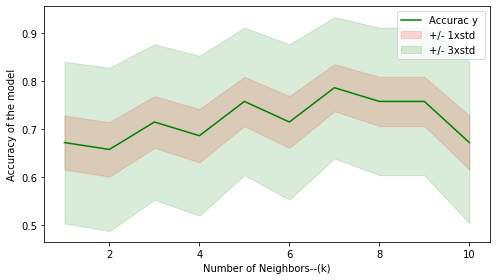

In [28]:
# Define the figure size, if necessary
plt.figure(figsize=(7,4)) # --> figsize=(width, height)

# Plot the model accuracy for different number of neighbors or, k
plt.plot(range(1,k+1),test_acc,'g')

# filling the area b/w two horizontal curves
plt.fill_between(range(1,k+1),test_acc - 1 * std_acc,test_acc + 1 * std_acc,alpha=0.15, color="red")
plt.fill_between(range(1,k+1),test_acc - 3 * std_acc,test_acc + 3 * std_acc,alpha=0.15,color="green")

plt.legend(('Accurac y ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy of the model')
plt.xlabel('Number of Neighbors--(k)')
plt.tight_layout()
plt.show()

In [29]:
# Display the least accuracy model
print(f"The least accuracy Model has k = {test_acc.argmin()+1} and Accuracy = {test_acc.min()}")

# Display the most accuracy model
print(f"The best accuracy Model has k = {test_acc.argmax()+1} and Accuracy = {test_acc.max()}")

The least accuracy Model has k = 2 and Accuracy = 0.6571428571428571
The best accuracy Model has k = 7 and Accuracy = 0.7857142857142857


# Decision Tree


In [30]:
# Load the required libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

loan_data = pd.read_csv("loan_train.csv", delimiter=",")
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [31]:
# Display the dimension of the DataSet
loan_data.shape

(346, 10)

`loan_train.csv` is already cleaned and normalized above to be used directly here

In [32]:
# 'loan_train.csv' data is already cleaned and normalized above to be used
# 'X' contains normalized Features set(inputs variables) and target variable 'loan_status' as 'y'
print("Normalized feature sets:\n", X[:5])
print("Normalized target variable:\n", y[:5])

Normalized feature sets:
 [[ 0.51578458  0.92071769  2.33152555 -0.42056004 -1.20577805 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.34170148  2.37778177 -1.20577805  2.61985426
  -0.87997669 -0.86968108]
 [ 0.51578458 -0.95911111 -0.65321055 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.48739188  2.37778177  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.3215732  -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]]
Normalized target variable:
 ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [33]:
# Now, use train-test split function to check and improve the out-of-sample accuracy of the model
# Using train-test split() to split the dataset into Training set and Testing test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print("Train Set size:", X_train.shape, y_train.shape)
print("Test Set size:", X_test.shape, y_test.shape)

Train Set size: (276, 8) (276,)
Test Set size: (70, 8) (70,)


In [34]:
# create the DecisionTree classifier object
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
decisionTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
# Fit the Decision Tree Classifier with Training Set and make predicitions
decisionTree.fit(X_train, y_train)
DecisionTreeClassifier(criterion='entropy', max_depth=6)
treePredictions = decisionTree.predict(X_test)

# Compare the predicted class labels with Actual labels
print(f"Predicted Class Labels:\n {treePredictions[:5]}")
print(f"Actual Class Labels:\n {y_test[:5]}")
print()

# Compare the Accuracy of the Traing set and Testing set
from sklearn import metrics
print("Train Set Accuracy:", metrics.accuracy_score(y_train, decisionTree.predict(X_train)))
print("Test Set Accuracy:", metrics.accuracy_score(y_test, treePredictions))

Predicted Class Labels:
 ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Actual Class Labels:
 ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']

Train Set Accuracy: 0.7753623188405797
Test Set Accuracy: 0.7714285714285715


In [36]:
# Install the scikit-learn version 0.22.2 --> runs the plot_tree() to plot Decision Tree Model
# !pip install scikit-learn==0.22.2

In [37]:
# pip install --upgrade sklearn

In [38]:
import sklearn
sklearn.__version__

'0.22.2'

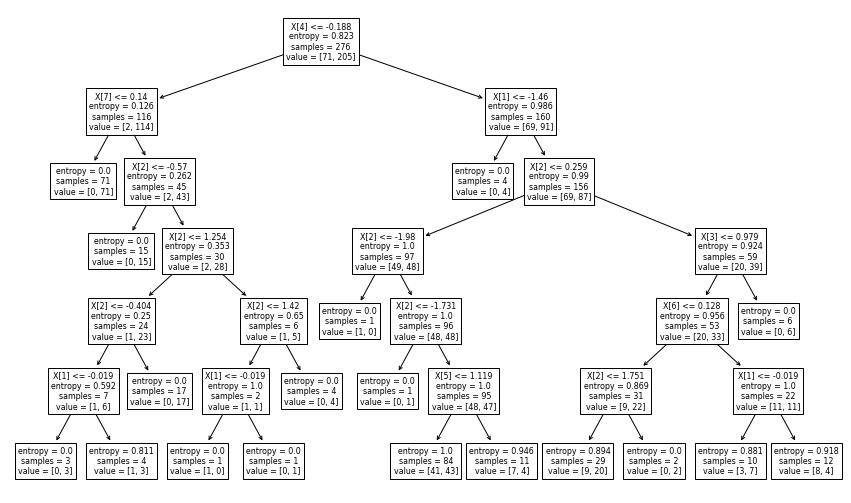

In [39]:
# Plot the Decision Tree 'decisionTree' build and trained above as
# To plot graph within cell if it's too large
%matplotlib inline

from sklearn.tree import plot_tree
plt.figure(figsize=(15,9))
plot_tree(decisionTree)
plt.show()

# Support Vector Machine


In [40]:
# Load required libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [41]:
# Lets have overview of our Dataset 
loan_data = pd.read_csv("loan_train.csv", delimiter=",")
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [42]:
# Display the dimension of the Dataset
loan_data.shape

(346, 10)

`loan_train.csv` is already cleaned and normalized above to be used directly here

In [43]:
# 'loan_train.csv' data is already cleaned and normalized above to be used
# 'X' contains normalized Features set(inputs variables) and target variable 'loan_status' as 'y'
print("Normalized feature sets:\n", X[:5])
print("Normalized target variable:\n", y[:5])

Normalized feature sets:
 [[ 0.51578458  0.92071769  2.33152555 -0.42056004 -1.20577805 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.34170148  2.37778177 -1.20577805  2.61985426
  -0.87997669 -0.86968108]
 [ 0.51578458 -0.95911111 -0.65321055 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.48739188  2.37778177  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.3215732  -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]]
Normalized target variable:
 ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [44]:
# Now, use train-test split function to check and improve the out-of-sample accuracy of the model
# Using train-test split() to split the dataset into Training set and Testing test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print("Train Set size:", X_train.shape, y_train.shape)
print("Test Set size:", X_test.shape, y_test.shape)

Train Set size: (276, 8) (276,)
Test Set size: (70, 8) (70,)


The `SVM` involves mapping data into a higher dimensional space is called **kernelling.** The
mathematical function used for the transformation is known as the **kernel function,** and
can be of different types: <br>
Here, we will be using: -> default, `RBF (Radial Basis Function)`

In [45]:
# Build and Train the SVM model
from sklearn import svm
svmModel = svm.SVC(kernel='rbf')
svmModel.fit(X_train, y_train)

# Predict the the values of Test set as 
svmPredictions = svmModel.predict(X_test)

In [46]:
# Compare the predicted class labels with Actual labels
print(f"Predicted Class Labels:\n {svmPredictions[:5]}")
print(f"Actual Class Labels:\n {y_test[:5]}")
print()

# Compare the Accuracy of the Traing set and Testing set
from sklearn import metrics
print("Train Set Accuracy:", metrics.accuracy_score(y_train, svmModel.predict(X_train)))
print("Test Set Accuracy:", metrics.accuracy_score(y_test, svmPredictions))

Predicted Class Labels:
 ['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Actual Class Labels:
 ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']

Train Set Accuracy: 0.782608695652174
Test Set Accuracy: 0.7428571428571429


# Logistic Regression


In [47]:
# Load requried libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
# Lets have overview of our Dataset 
loan_data = pd.read_csv("loan_train.csv", delimiter=",")
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [49]:
# Display the dimension of the Dataset
loan_data.shape

(346, 10)

`loan_train.csv` is already cleaned and normalized above to be used directly here

In [50]:
# 'loan_train.csv' data is already cleaned and normalized above to be used
# 'X' contains normalized Features set(inputs variables) and target variable 'loan_status' as 'y'
print("Normalized feature sets:\n", X[:5])
print("Normalized target variable:\n", y[:5])

Normalized feature sets:
 [[ 0.51578458  0.92071769  2.33152555 -0.42056004 -1.20577805 -0.38170062
   1.13639374 -0.86968108]
 [ 0.51578458  0.92071769  0.34170148  2.37778177 -1.20577805  2.61985426
  -0.87997669 -0.86968108]
 [ 0.51578458 -0.95911111 -0.65321055 -0.42056004 -1.20577805 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.48739188  2.37778177  0.82934003 -0.38170062
  -0.87997669  1.14984679]
 [ 0.51578458  0.92071769 -0.3215732  -0.42056004  0.82934003 -0.38170062
  -0.87997669  1.14984679]]
Normalized target variable:
 ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [51]:
# Now, use train-test split function to check and improve the out-of-sample accuracy of the model
# Using train-test split() to split the dataset into Training set and Testing test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print("Train Set size:", X_train.shape, y_train.shape)
print("Test Set size:", X_test.shape, y_test.shape)

Train Set size: (276, 8) (276,)
Test Set size: (70, 8) (70,)


<hr>

Let's build our model using `LogisticRegression` from the Scikit-learn package. This
function implements logistic regression and can use different numerical optimizers to find
parameters, including `‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.`<br>

The version of Logistic Regression in Scikit-learn, support **regularization.** `Regularization
is a technique used to solve the overfitting problem of machine learning models.` `C`
parameter indicates inverse of regularization strength which must be a positive float.
**Smaller values specify stronger regularization.**

In [52]:
# Let's build and Train our Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrModel = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)

# Test the model by predicting the value of Test set as
lrPredictions = lrModel.predict(X_test)

In [53]:
# Compare the predicted class labels with Actual labels
print(f"Predicted Class Labels:\n {lrPredictions[:5]}")
print(f"Actual Class Labels:\n {y_test[:5]}")
print()

# Compare the Accuracy of the Traing set and Testing set
from sklearn import metrics
print("Train Set Accuracy:", metrics.accuracy_score(y_train, lrModel.predict(X_train)))
print("Test Set Accuracy:", metrics.accuracy_score(y_test, lrPredictions))

Predicted Class Labels:
 ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Actual Class Labels:
 ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']

Train Set Accuracy: 0.7427536231884058
Test Set Accuracy: 0.7857142857142857


<hr>
<h1>Model Evaluation using Test set</h1>
<hr>

In [54]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [55]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-06-04 14:48:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-06-04 14:48:45 (108 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [56]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [57]:
# Dimension of the test Dataset
test_df.shape

(54, 10)

In [58]:
# Checking the datatype of each column in the test Dataframe
test_df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [59]:
# convert date columns to date-time objects
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


### Preprocessing -> Feature Selection/Extraction

In [60]:
# get the day of the day people took the loan to new column as
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

# use Feature Binarization -> set value to 0 if dayofweek is less then 4 and vice versa
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [61]:
# let's review the loan_status of each sex as 
test_df.groupby('Gender')['loan_status'].value_counts() # or, value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF         8
        COLLECTION      3
male    PAIDOFF        32
        COLLECTION     11
Name: loan_status, dtype: int64

### Converting Categorical Features to Numerical values

In [62]:
# Set male as 0 and female as 1
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


#### Use one hot encoding technique to convert `categorical varibles to binary variables` and append them to the feature Data Frame

In [63]:
testFeature = test_df[['Principal','terms','age','Gender','weekend']]

testFeature = pd.concat([testFeature,pd.get_dummies(test_df['education'])], axis=1)
testFeature.drop(['Master or Above'], axis = 1,inplace=True)

testFeature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [64]:
# Normalize the Data
test_X = preprocessing.StandardScaler().fit(testFeature).transform(testFeature)

# Display Normalized Features
print("Normalized Features: \n", test_X[:5])

Normalized Features: 
 [[ 0.49362588  0.92844966  3.05981865  1.97714211 -1.30384048  2.39791576
  -0.79772404 -0.86135677]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054  0.76696499 -0.41702883
  -0.79772404 -0.86135677]
 [ 0.49362588  0.92844966  1.88080596  1.97714211  0.76696499 -0.41702883
   1.25356634 -0.86135677]
 [ 0.49362588  0.92844966 -0.98251057 -0.50578054  0.76696499 -0.41702883
  -0.79772404  1.16095912]
 [-0.66532184 -0.78854628 -0.47721942 -0.50578054  0.76696499  2.39791576
  -0.79772404 -0.86135677]]


In [65]:
# Display Target labels
test_y = test_df['loan_status'].values
test_y[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [67]:
# Dimension of the Feature set
test_X.shape

(54, 8)

In [66]:
# Dimension of the target variable
test_y.shape

(54,)

## k-Nearest Neighbors(kNN)

In [70]:
# Make a prediction using trained kNN Model('neigh') with Test set
knnYhat = neigh.predict(test_X)

# Display jaccard_score and f1_score --> log_loss is only for Logistic Regression
print("kNN Jaccard Score: %.4f" % jaccard_score(test_y, knnYhat, pos_label='PAIDOFF'))
print("kNN F1_Score: %.4f" % f1_score(test_y, knnYhat, average='weighted'))

kNN Jaccard Score: 0.6667
kNN F1_Score: 0.7037


## Decision Tree

In [73]:
# Make a predictions using trained Decision Tree Model('treeModel') with Test Set
treeYhat = decisionTree.predict(test_X)

# Display jaccard_score and f1_score --> log_loss is only for Logistic Regression
print("Decision Tree Jaccard Score: %.4f" % jaccard_score(test_y, treeYhat, pos_label='PAIDOFF'))
print("Decision Tree F1_Score: %.4f" % f1_score(test_y, treeYhat, average='weighted'))

Decision Tree Jaccard Score: 0.7115
Decision Tree F1_Score: 0.6705


## Support Vector Machine(SVM)

In [75]:
# Make a predictions using trained Decision Tree Model('treeModel') with Test Set
svmYhat = svmModel.predict(test_X)

# Display jaccard_score and f1_score --> log_loss is only for Logistic Regression
print("SVM Jaccard Score: %.4f" % jaccard_score(test_y, svmYhat, pos_label='PAIDOFF'))
print("SVM F1_Score: %.4f" % f1_score(test_y, svmYhat, average='weighted'))

SVM Jaccard Score: 0.7800
SVM F1_Score: 0.7584


## Logistic Regression
**predict_proba()** returns estimates for all classes, ordered by the label of classes. So, the first
column is the probability of class 0, `P(Y=0|X)`, and second column is probability of class 1,
`P(Y=1|X)`:

ValueError: Expected array-like (array or non-string sequence), got 'PAIDOFF'

0.5

In [80]:
# Make a predictions using trained Decision Tree Model('treeModel') with Test Set
lrYhat = lrModel.predict(test_X)

# Predict the probabilities of each classes
lrYhat_Prob = lrModel.predict_proba(test_X)

# Display jaccard_score, f1_score & log_loss(works only for Logistic Regression)
print("Logistic Regression Jaccard Score: %.4f" % jaccard_score(test_y, lrYhat, pos_label='PAIDOFF'))
print("Logistic Regression F1_Score: %.4f" % f1_score(test_y, lrYhat, average='weighted'))
print("Logistic Regression log_loss: %.4f" % log_loss(test_y, lrYhat_Prob))

Logistic Regression Jaccard Score: 0.7407
Logistic Regression F1_Score: 0.6304
Logistic Regression log_loss: 0.5164


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


If the entire set of `predicted labels` for a sample strictly matches with `Actual labels`, then the
**jaccard_score** is 1.0; otherwise it is 0.0.<br>

The higher the **F1_score** the better, with 0 being the worst possible and 1 being the best. <br>

**Log-loss** is indicative of how `close the prediction probability` is to the corresponding actual/true value (**0 or 1 in case of binary classification**).


| Algorithm              |  Jaccard    |   F1-score    |  LogLoss   |
| ---------------------- |  -------    |   --------    |  --------  |
| KNN                    |  0.6667     |   0.7037      |    NA      |
| Decision Tree          |  0.7115     |   0.6705      |    NA      |
| SVM                    |  0.7800     |   0.7584      |    NA      |
| LogisticRegression     |  0.7407     |   0.6304      |  0.5164    |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
